In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
clinic = pd.read_csv('vitaldb_cases.csv')
clinic

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [69]:
clinic['age'].unique()

array([77. , 54. , 62. , 74. , 66. , 78. , 52. , 81. , 32. , 72. , 56. ,
       46. , 67. , 23. , 57. , 85. , 75. , 69. , 53. , 64. , 50. , 59. ,
       58. , 47. , 38. , 68. , 41. , 45. , 73. , 36. , 44. , 71. , 18. ,
       42. , 55. , 76. , 61. , 48. , 70. , 34. , 49. , 16. , 33. , 51. ,
       35. , 26. , 22. , 63. , 60. , 79. , 80. , 65. , 19. , 43. , 37. ,
        9. , 84. , 24. , 28. , 20. , 40. , 87. , 89. ,  0.7, 31. ,  0.6,
       27. , 39. , 83. ,  0.8, 82. , 30. ,  8. , 17. , 21. , 29. , 86. ,
       92. , 10. ,  6. , 15. , 12. , 25. , 88. ,  5. , 14. ,  0.3, 91. ,
       90. ,  7. , 13. ,  0.4, 11. , 94. ])

In [70]:
def group_age(age):
    if age < 10:
        return '0-9'
    tens = int(age // 10)
    return f'{tens}0-{tens}9' # such as 10-19

clinic['age_buckets'] = clinic['age'].transform(group_age)
clinic[['age_buckets', 'age']]

,age_buckets,age
0,70-79,77.0
1,50-59,54.0
2,60-69,62.0
3,70-79,74.0
4,60-69,66.0
...,...,...
6383,60-69,64.0
6384,60-69,69.0
6385,60-69,61.0
6386,20-29,24.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '0-9'),
  Text(1, 0, '10-19'),
  Text(2, 0, '20-29'),
  Text(3, 0, '30-39'),
  Text(4, 0, '40-49'),
  Text(5, 0, '50-59'),
  Text(6, 0, '60-69'),
  Text(7, 0, '70-79'),
  Text(8, 0, '80-89'),
  Text(9, 0, '90-99')])

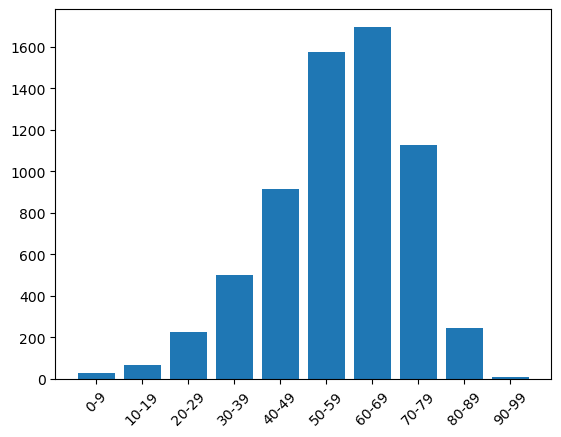

In [71]:
grouped_count = clinic.groupby('age_buckets').count()['caseid']
plt.bar(grouped_count.index, grouped_count)
plt.xticks(rotation=45)

In [72]:
clinic['death_inhosp']

0       0
1       0
2       0
3       0
4       0
       ..
6383    0
6384    0
6385    0
6386    0
6387    0
Name: death_inhosp, Length: 6388, dtype: int64

([<matplotlib.patches.Wedge at 0x291227f20>,
 [Text(-1.0995678294087305, 0.030831615743794814, 'No Mortality'),
  Text(1.0995678280556056, -0.030831664001124755, 'Mortality')])

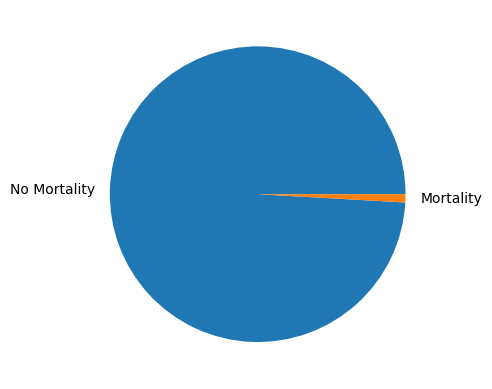

In [73]:
mortality = clinic.groupby('death_inhosp')['caseid'].count()
plt.pie(mortality, labels=['No Mortality', 'Mortality'])

In [78]:
def display_stats(group_name):
    print(f'Stats for {group_name} age group')
    df = clinic[clinic['age_buckets'] == group_name]
    print(f'{df.shape[0]} total surgeries')

    # distribution of surgery type
    type_surgery = df.groupby('approach')['caseid'].count()
    plt.bar(type_surgery.index, type_surgery)
    plt.title(f'Distribution of surgery type for {group_name} group')
    plt.xlabel('type')
    plt.show()

    # distribution of sex
    grouped_sex = df.groupby('sex')['caseid'].count() / df.shape[0]
    plt.bar(grouped_sex.index, grouped_sex)
    plt.title(f'Gender distribution of {group_name} group')
    plt.ylabel('proportion')
    plt.xlabel('Gender')
    plt.show()

    # Mortality
    sizes = df.groupby('death_inhosp')['caseid'].count()
    display(sizes)
    plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%')
    plt.title(f'Mortality of {group_name} age group')
    plt.show()


    # surgery duration, in minutes
    df['duration'] = df['caseend'] / 60
    plt.hist(df['duration'], ec='w')
    plt.title(f'Distribution of surgery times for {group_name} group')
    plt.xlabel('duration in minutes')
    plt.show()

Stats for 70-79 age group
1129 total surgeries


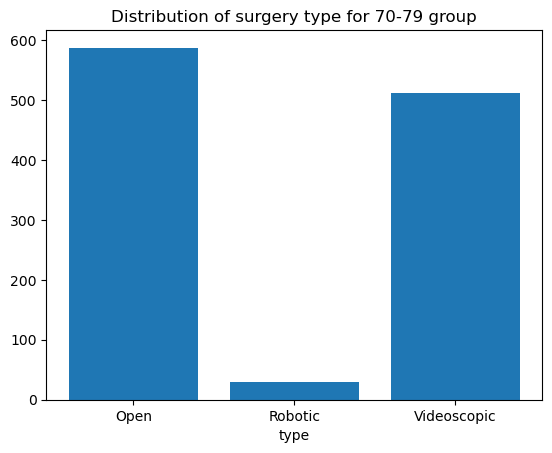

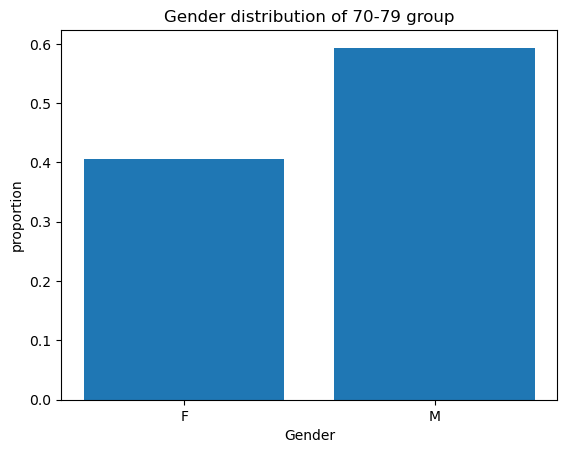

death_inhosp
0    1115
1      14
Name: caseid, dtype: int64

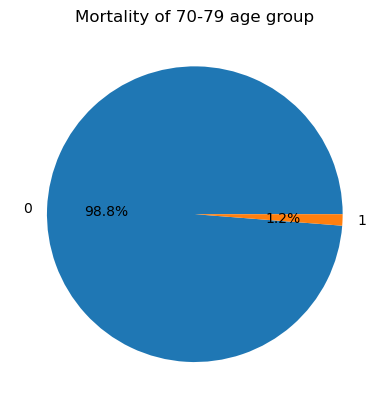

/var/folders/r6/j2xslqfj0lg0bxy1nj8b6fzm0000gn/T/ipykernel_45520/682056131.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['caseend'] / 60


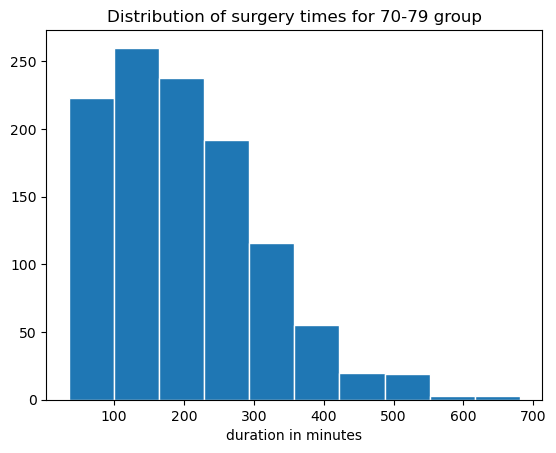

Stats for 50-59 age group
1575 total surgeries


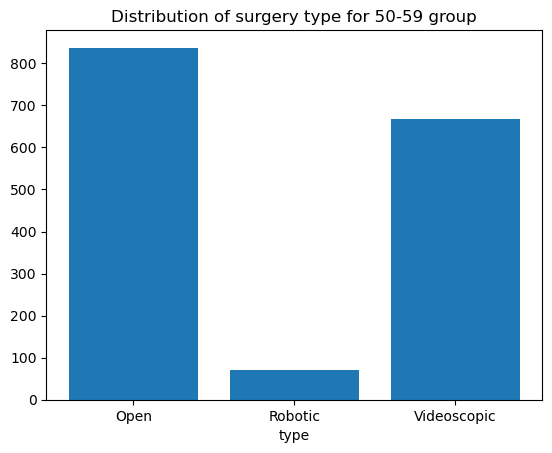

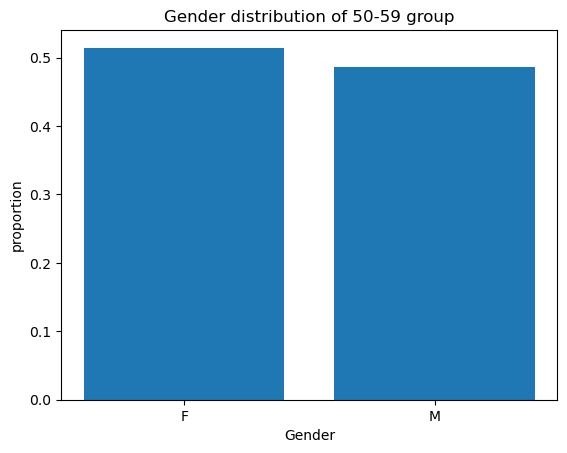

death_inhosp
0    1564
1      11
Name: caseid, dtype: int64

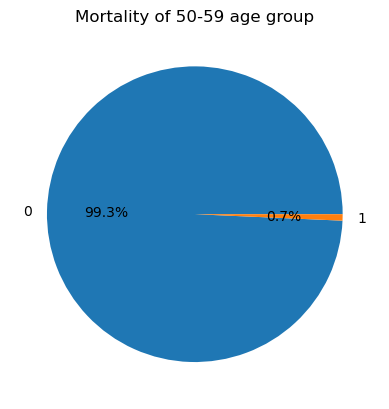

/var/folders/r6/j2xslqfj0lg0bxy1nj8b6fzm0000gn/T/ipykernel_45520/682056131.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['caseend'] / 60


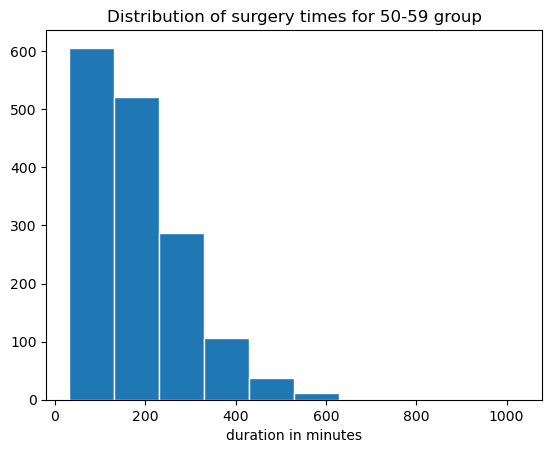

Stats for 60-69 age group
1697 total surgeries


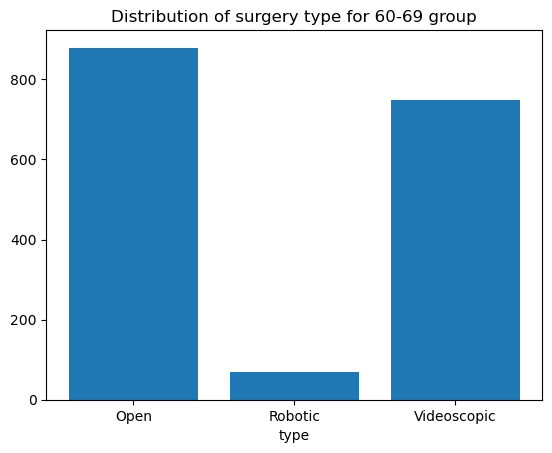

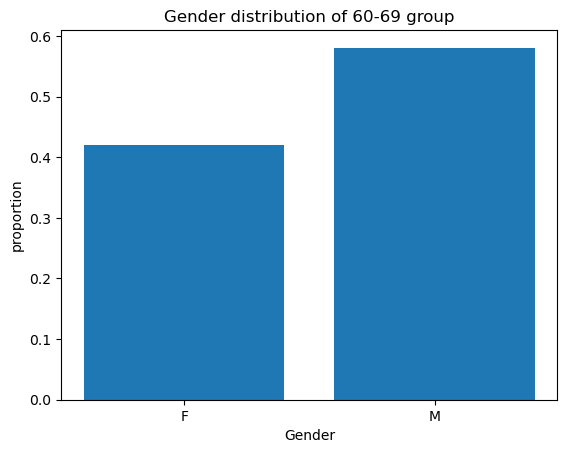

death_inhosp
0    1686
1      11
Name: caseid, dtype: int64

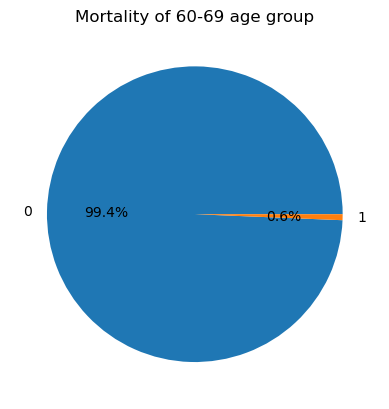

/var/folders/r6/j2xslqfj0lg0bxy1nj8b6fzm0000gn/T/ipykernel_45520/682056131.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['caseend'] / 60


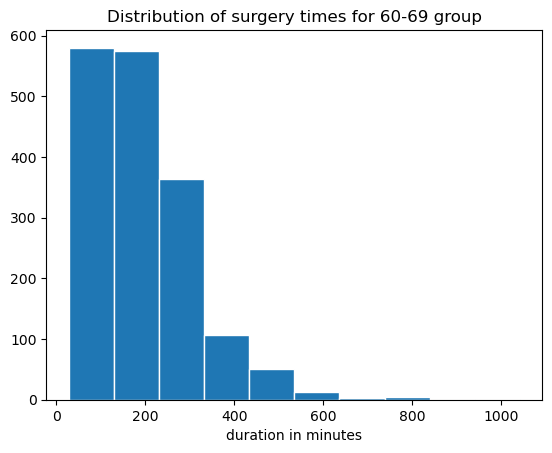

Stats for 80-89 age group
246 total surgeries


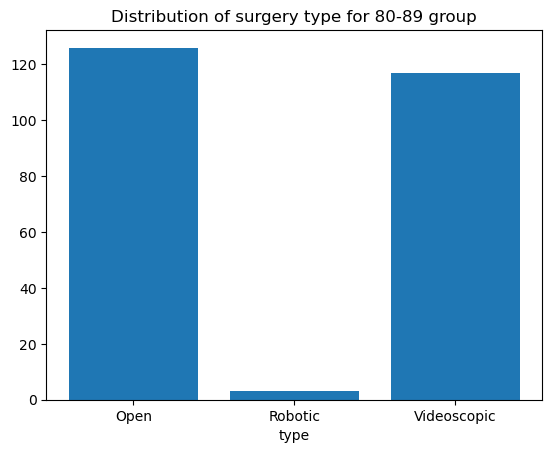

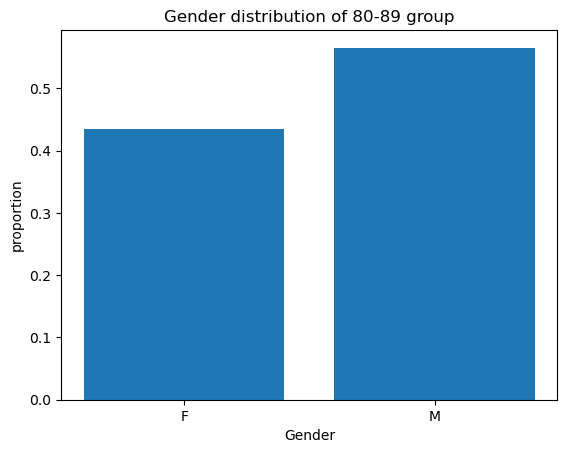

death_inhosp
0    241
1      5
Name: caseid, dtype: int64

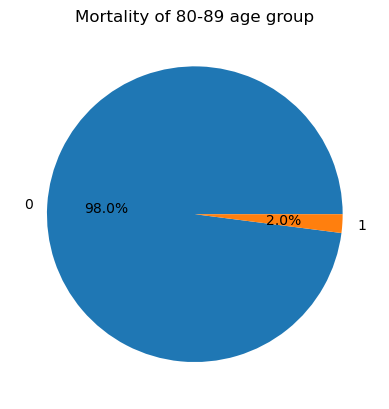

/var/folders/r6/j2xslqfj0lg0bxy1nj8b6fzm0000gn/T/ipykernel_45520/682056131.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['caseend'] / 60


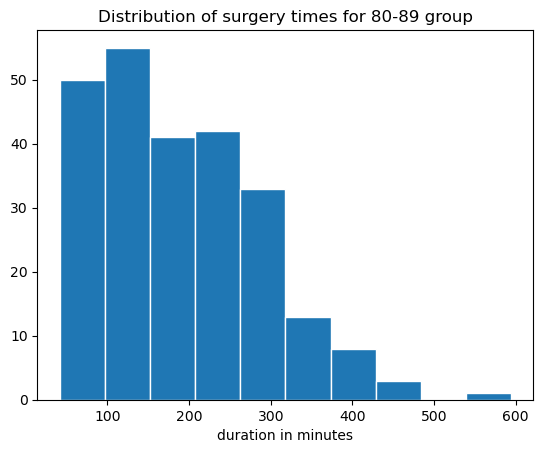

Stats for 30-39 age group
500 total surgeries


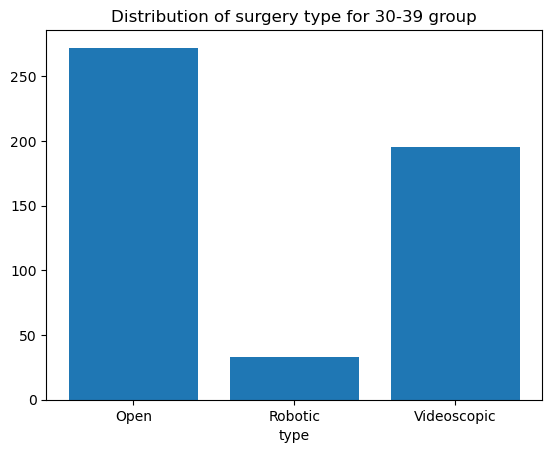

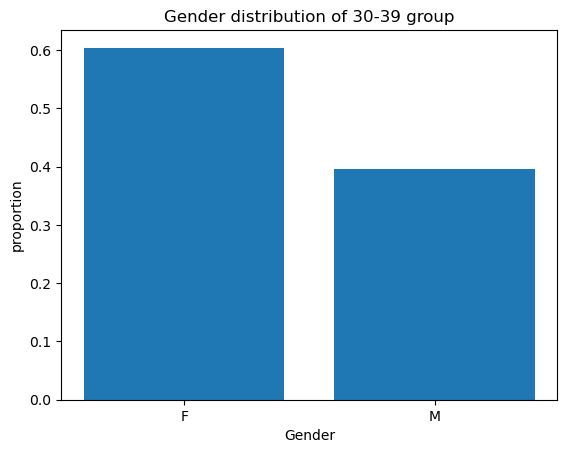

death_inhosp
0    496
1      4
Name: caseid, dtype: int64

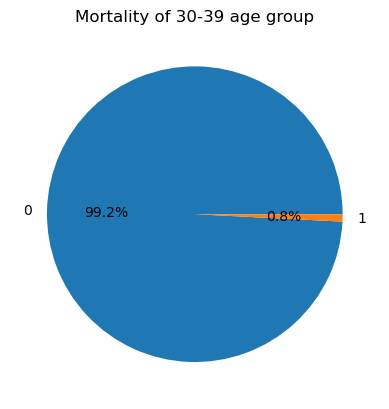

/var/folders/r6/j2xslqfj0lg0bxy1nj8b6fzm0000gn/T/ipykernel_45520/682056131.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['caseend'] / 60


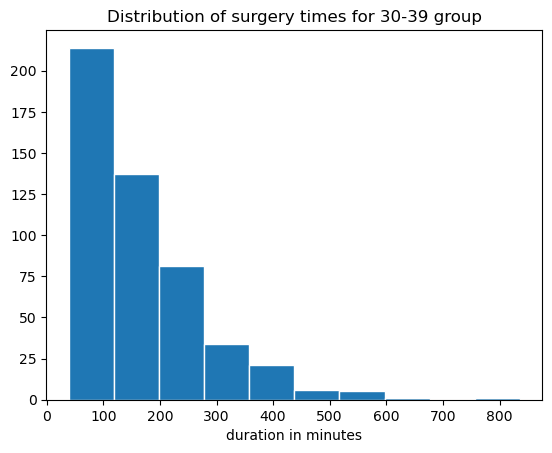

Stats for 40-49 age group
914 total surgeries


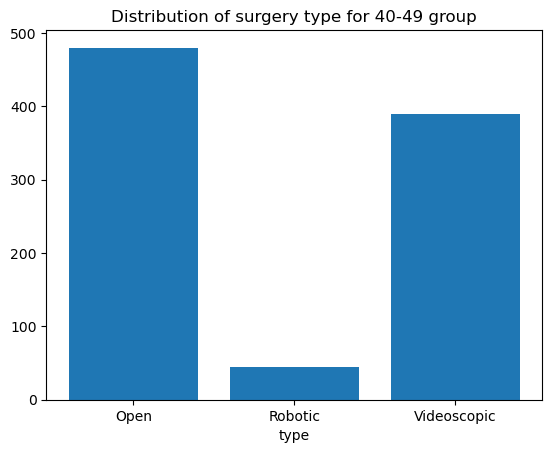

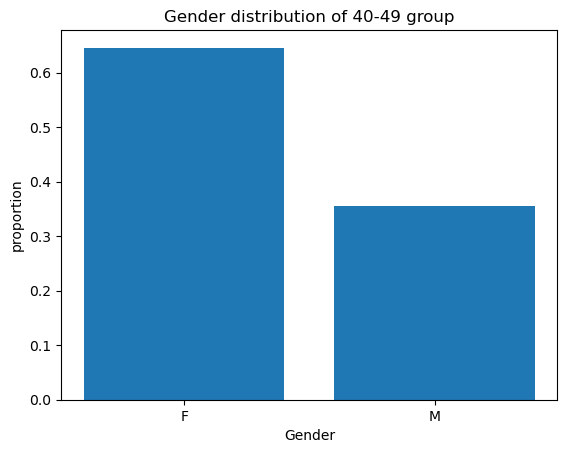

death_inhosp
0    909
1      5
Name: caseid, dtype: int64

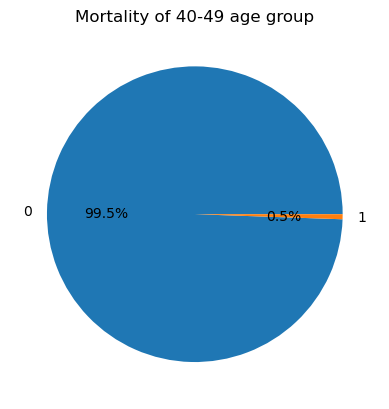

/var/folders/r6/j2xslqfj0lg0bxy1nj8b6fzm0000gn/T/ipykernel_45520/682056131.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['caseend'] / 60


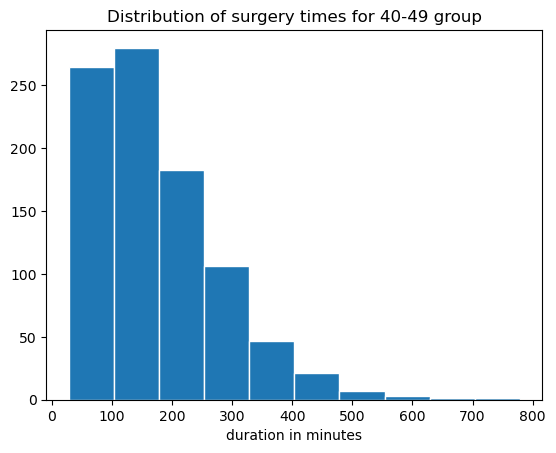

Stats for 20-29 age group
224 total surgeries


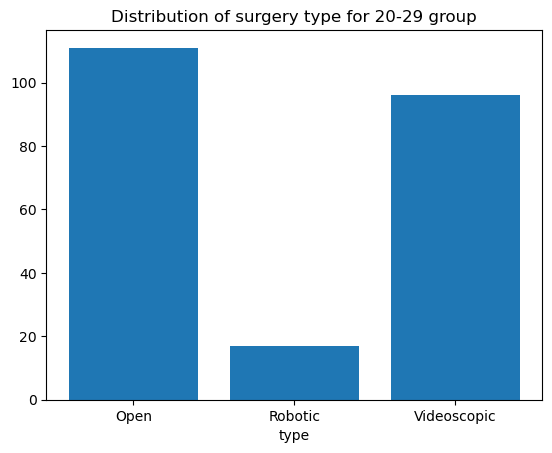

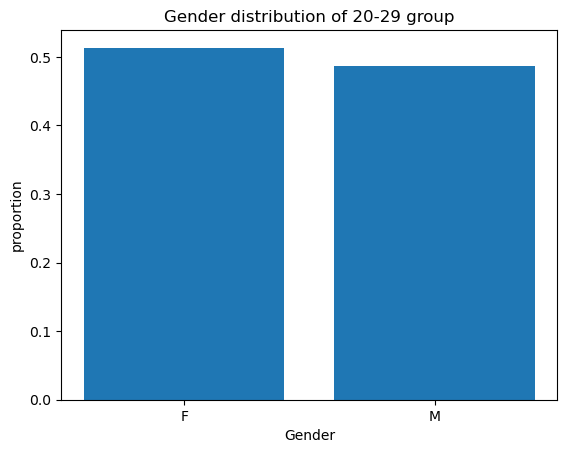

death_inhosp
0    222
1      2
Name: caseid, dtype: int64

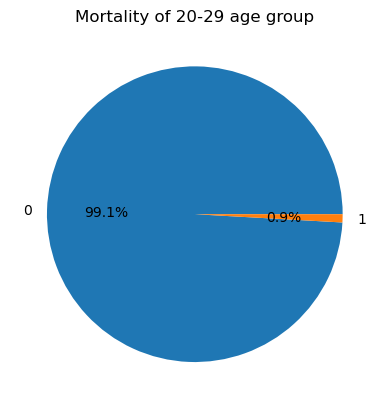

/var/folders/r6/j2xslqfj0lg0bxy1nj8b6fzm0000gn/T/ipykernel_45520/682056131.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['caseend'] / 60


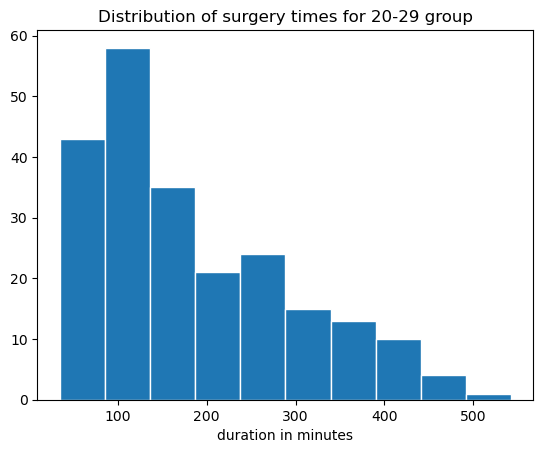

Stats for 10-19 age group
66 total surgeries


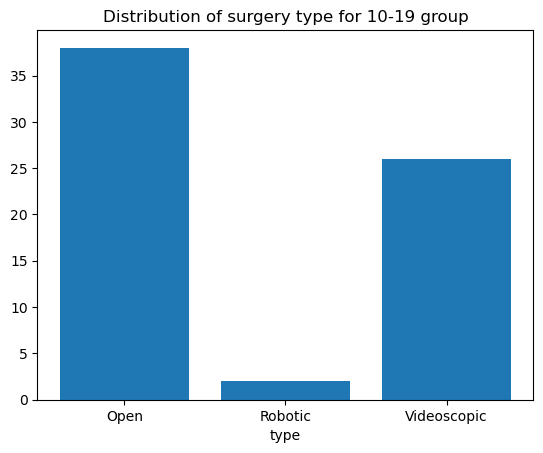

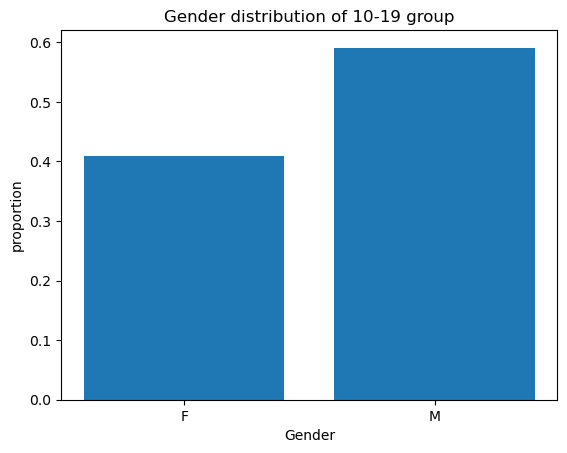

death_inhosp
0    66
Name: caseid, dtype: int64

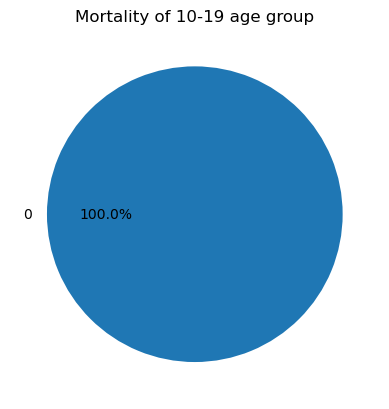

/var/folders/r6/j2xslqfj0lg0bxy1nj8b6fzm0000gn/T/ipykernel_45520/682056131.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['caseend'] / 60


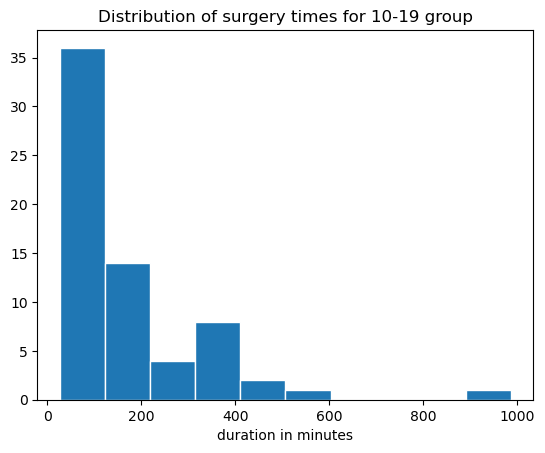

Stats for 0-9 age group
29 total surgeries


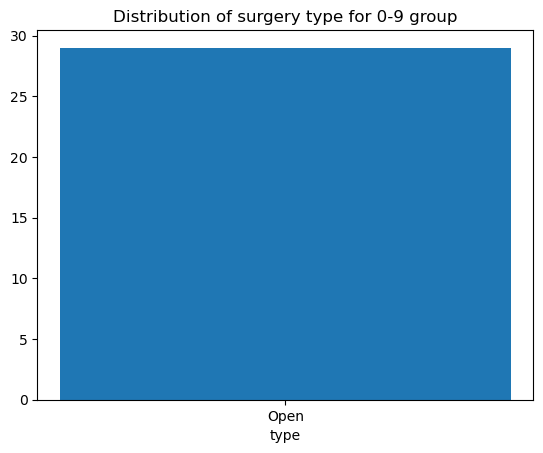

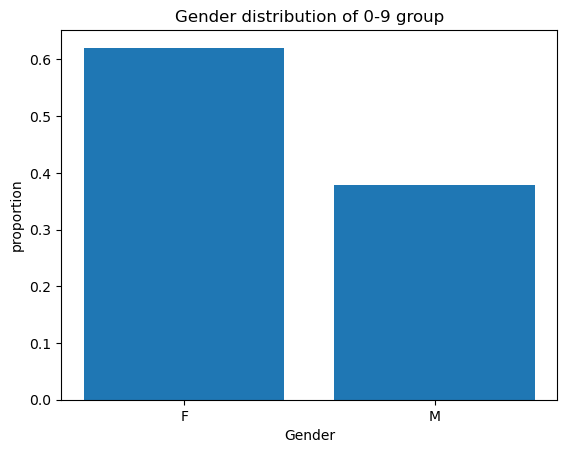

death_inhosp
0    24
1     5
Name: caseid, dtype: int64

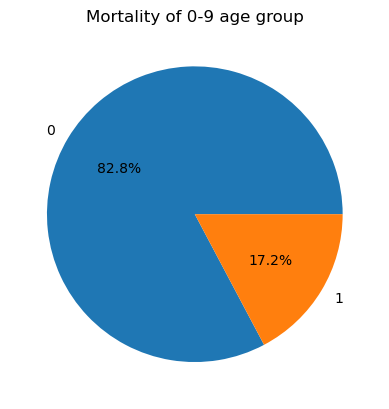

/var/folders/r6/j2xslqfj0lg0bxy1nj8b6fzm0000gn/T/ipykernel_45520/682056131.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['caseend'] / 60


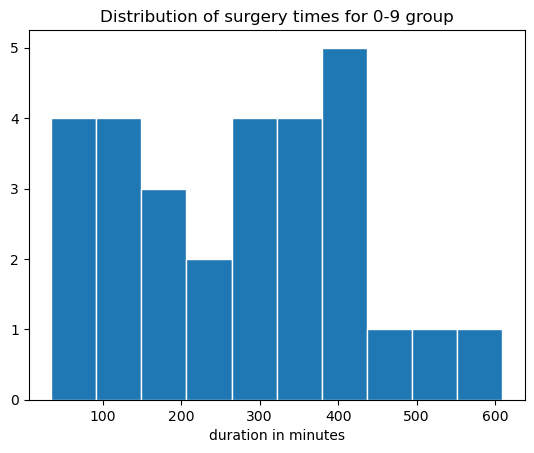

Stats for 90-99 age group
8 total surgeries


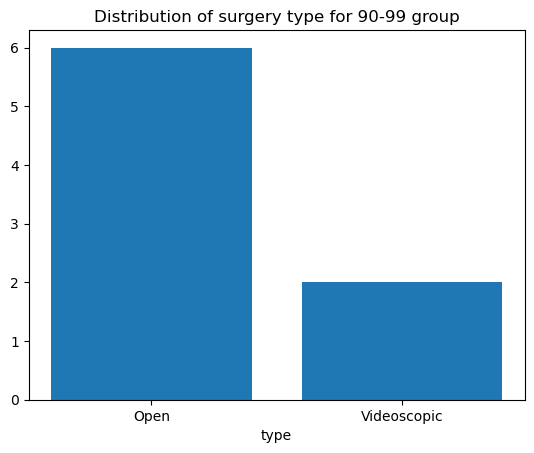

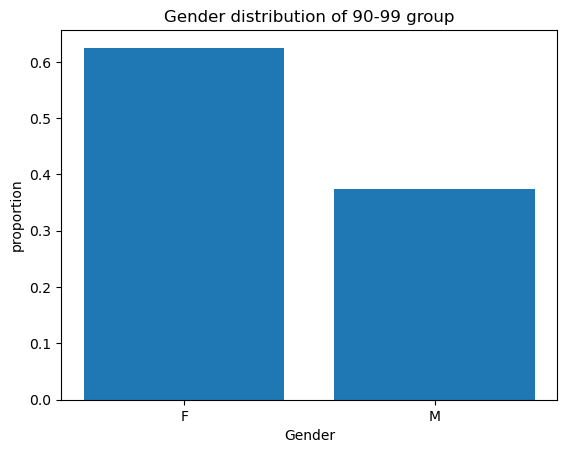

death_inhosp
0    8
Name: caseid, dtype: int64

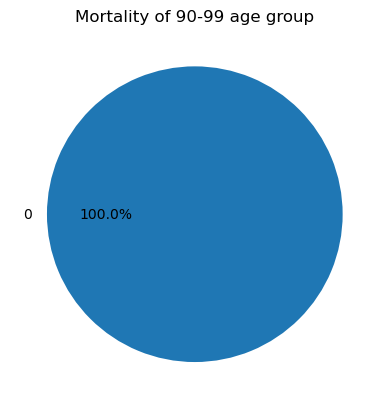

/var/folders/r6/j2xslqfj0lg0bxy1nj8b6fzm0000gn/T/ipykernel_45520/682056131.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['caseend'] / 60


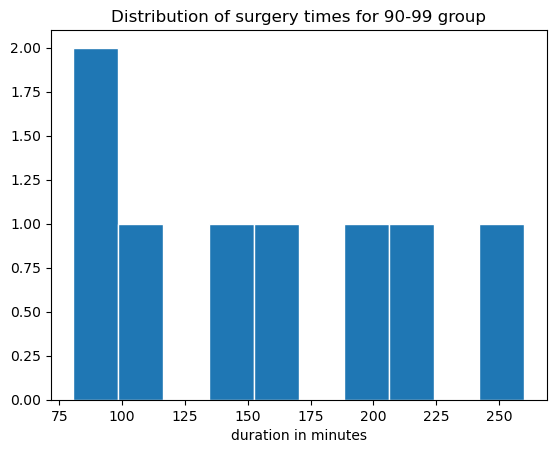

In [79]:
groups = clinic['age_buckets'].unique()
for group in groups:
    display_stats(group)